In [1]:
print("hellos")
from keras.models import Sequential,load_model
from keras.layers import LSTM ,Dense ,ConvLSTM2D,Flatten,Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
import operator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from JSON import load_data_from_csv_word_inDiction,load_data_from_csv_wordCount
import matplotlib.pyplot as plt
import numpy as np 
import conf
from sklearn.model_selection import train_test_split
print("done")

hellos


Using Theano backend.


done


In [37]:
def load_data_from_csv_wordCount(sizeOfDataSet=0, file=None):
    # pass 0 in sizeOfDataSet to get full dataset
    file = open(file, 'r')
    data = np.array([])
    dicti={}
    newDict={}
    cls = []
    index = -1
    deletedd=False
    totalWords=np.load("wo.npy")
    for i in range(290):
            data=np.append(data,0)
    data=np.expand_dims(data,axis=0)
    for video in file:

        if (sizeOfDataSet != 0):
            if (len(dicti) == sizeOfDataSet+1):
                break;

        if index == -1:
            index += 1
            continue;

        features = video.split(',')
        # if(len(features)<580) or len(features)> 590:
        #     continue;
        if features[291]=='28.30194339616981' :
            print("why")
        if features[291][:-1] not in dicti:
            dicti[features[291][:-1]]=1
            newDict[features[291][:-1]]=[]
        else  :
            dicti[features[291][:-1]]+=1
        # elif dict[features[581]] == 950:
        #     continue;
        # # print(features[581] != 'BANKS')
#         data.append([])

        # print(1)
        
        array_features=[]
        for i in range(1, 291):
            array_features=np.append(array_features,features[i])
            if (i == 290):
                cls.append(features[291][:-1])
#         data=np.array(data)
#         print(len(array_features))
#         print(len(data[-1]))
        data=np.append(data,[array_features],axis=0)
#         print(len(data))
        array_features=[]
        if(deletedd==False):
            deletedd=True
            data=np.delete(data,0,0)
#         data=data.astype('float')/data.max()
        output=data.reshape(len(data),29,10)
        labels=[]
        for label in cls:
            labels.append(np.where(totalWords==label)[0][0])
        y=to_categorical(labels,500)
#         print(len(output),len(y))
        yield (output, y)
        
#         break
#         index += 1
    # print('why')
    if sizeOfDataSet !=0:
        dicti.popitem()
        newDict.popitem()
        data=data[:len(data)-1]
        cls = cls[:len(cls) - 1]
    return np.array(output,dtype=float), np.array(cls)
load_data_from_csv_wordCount(sizeOfDataSet=5,file="Geometric.csv")
# print(len(x))

<generator object load_data_from_csv_wordCount at 0x7fe5511d4518>

In [2]:
import json
print("start")
classes=10
x,y,d=load_data_from_csv_wordCount(sizeOfDataSet=0,file="ourInterpolate.csv")
# xtest,ytest=load_data_from_csv_word_inDiction(sizeOfDataSet=0,file="test_dataset.csv",dict=d)
# xv,yv=load_data_from_csv_word_inDiction(sizeOfDataSet=0,file="validate_dataset.csv",dict=d)
# print(y[0])
# print(y[:23])
x=x.astype('float')/x.max()
x,xtest,y,ytest=train_test_split(x, y, test_size=0.1, random_state=613)
x=x.reshape(len(x),110,10)
xtest=xtest.reshape(len(xtest),110,10)
# xv=xv.reshape(len(xv),29,10)
# yt.sort()
# ytest.sort()
# yv.sort()
# with open('words.json', 'w') as fp:
#     json.dump(d, fp)
# with open('words.json', 'r') as fp:
#     da=json.load( fp)
#     k,v=da.items()[0]
#     print(k)

# print(y[0])
uniques, id_test1=np.unique(y,return_inverse=True)

# uniques=np.sort(uniques)
# print(uniques)
y=to_categorical(id_test1,classes)
# print(y[0])
uniques, id_test=np.unique(ytest,return_inverse=True)
ytest=to_categorical(id_test,classes)
print(uniques)
# yt=yt.reshape(len(yt),10,1)
# ytest=ytest.reshape(len(ytest),10,1)
# uniques, id_test=np.unique(yv,return_inverse=True)
# yv=to_categorical(id_test,10)

print("done")


start
ourInterpolate.csv
['left' 'move' 'right' 'stop']
done


In [7]:
print(y[0])
print(d)

NameError: name 'uniques' is not defined

In [5]:

ES=EarlyStopping(patience=5)
# print(x)
filepath="saved10/weights.{epoch:02d}.h5"
check = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
Model=Sequential()
Model.add(LSTM(128,return_sequences=True,input_shape=(110,10)))

Model.add(LSTM(128 , return_sequences=True))

Model.add(LSTM(64,return_sequences=True))

# Model.add(LSTM(32,return_sequences=True))

# Model.add(LSTM(32,return_sequences=True))

# Model.add(LSTM(16,return_sequences=True))

# Model.add(LSTM(128,return_sequences=True))

# Model.add(LSTM(64,return_sequences=True))

# Model.add(LSTM(32,return_sequences=True))
Model.add(Flatten())
Model.add(Dense(256,activation='relu'))
Model.add(Dense(256,activation='relu'))
# Model.add(Dense(512,activation='relu'))
Model.add(Dense(classes,activation='softmax'))
Model.compile(loss='categorical_crossentropy', optimizer='RMSprop',
metrics=['accuracy'])
# print(y.shape)

In [6]:
train_result=Model.fit(x,y,validation_data=(xtest,ytest),epochs=40,callbacks=[ES,check])
# Model.fit_generator(load_data_from_csv_wordCount(sizeOfDataSet=0,file="Geometric.csv"),
#         steps_per_epoch=1000, epochs=10)

Train on 189 samples, validate on 22 samples
Epoch 1/40
189/189 [==============================] - 3s - loss: 2.5289 - acc: 0.2434 - val_loss: 1.9589 - val_acc: 0.3636
Epoch 2/40
189/189 [==============================] - 2s - loss: 1.6240 - acc: 0.2222 - val_loss: 1.6139 - val_acc: 0.1364
Epoch 3/40
189/189 [==============================] - 2s - loss: 1.4861 - acc: 0.2381 - val_loss: 1.3680 - val_acc: 0.3636
Epoch 4/40
189/189 [==============================] - 2s - loss: 1.4461 - acc: 0.2063 - val_loss: 1.4127 - val_acc: 0.2727
Epoch 5/40
189/189 [==============================] - 2s - loss: 1.4527 - acc: 0.2222 - val_loss: 1.3821 - val_acc: 0.2727
Epoch 6/40
189/189 [==============================] - 2s - loss: 1.4471 - acc: 0.2328 - val_loss: 1.6629 - val_acc: 0.1364
Epoch 7/40
189/189 [==============================] - 2s - loss: 1.4255 - acc: 0.2857 - val_loss: 1.5177 - val_acc: 0.1364
Epoch 8/40
189/189 [==============================] - 2s - loss: 1.4524 - acc: 0.2275 - val_lo

## 

In [8]:
Model=load_model("models/weights.16.h5")
counter=0
for i in range(len(xtest)):
    result=Model.predict(np.array([xtest[i]]))
    res=np.argmax(result)
    tr=np.argmax(ytest[i])
    if tr ==res:
        
        counter+=1

1/1 [==============================] - 0s
Normalized confusion matrix
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]]


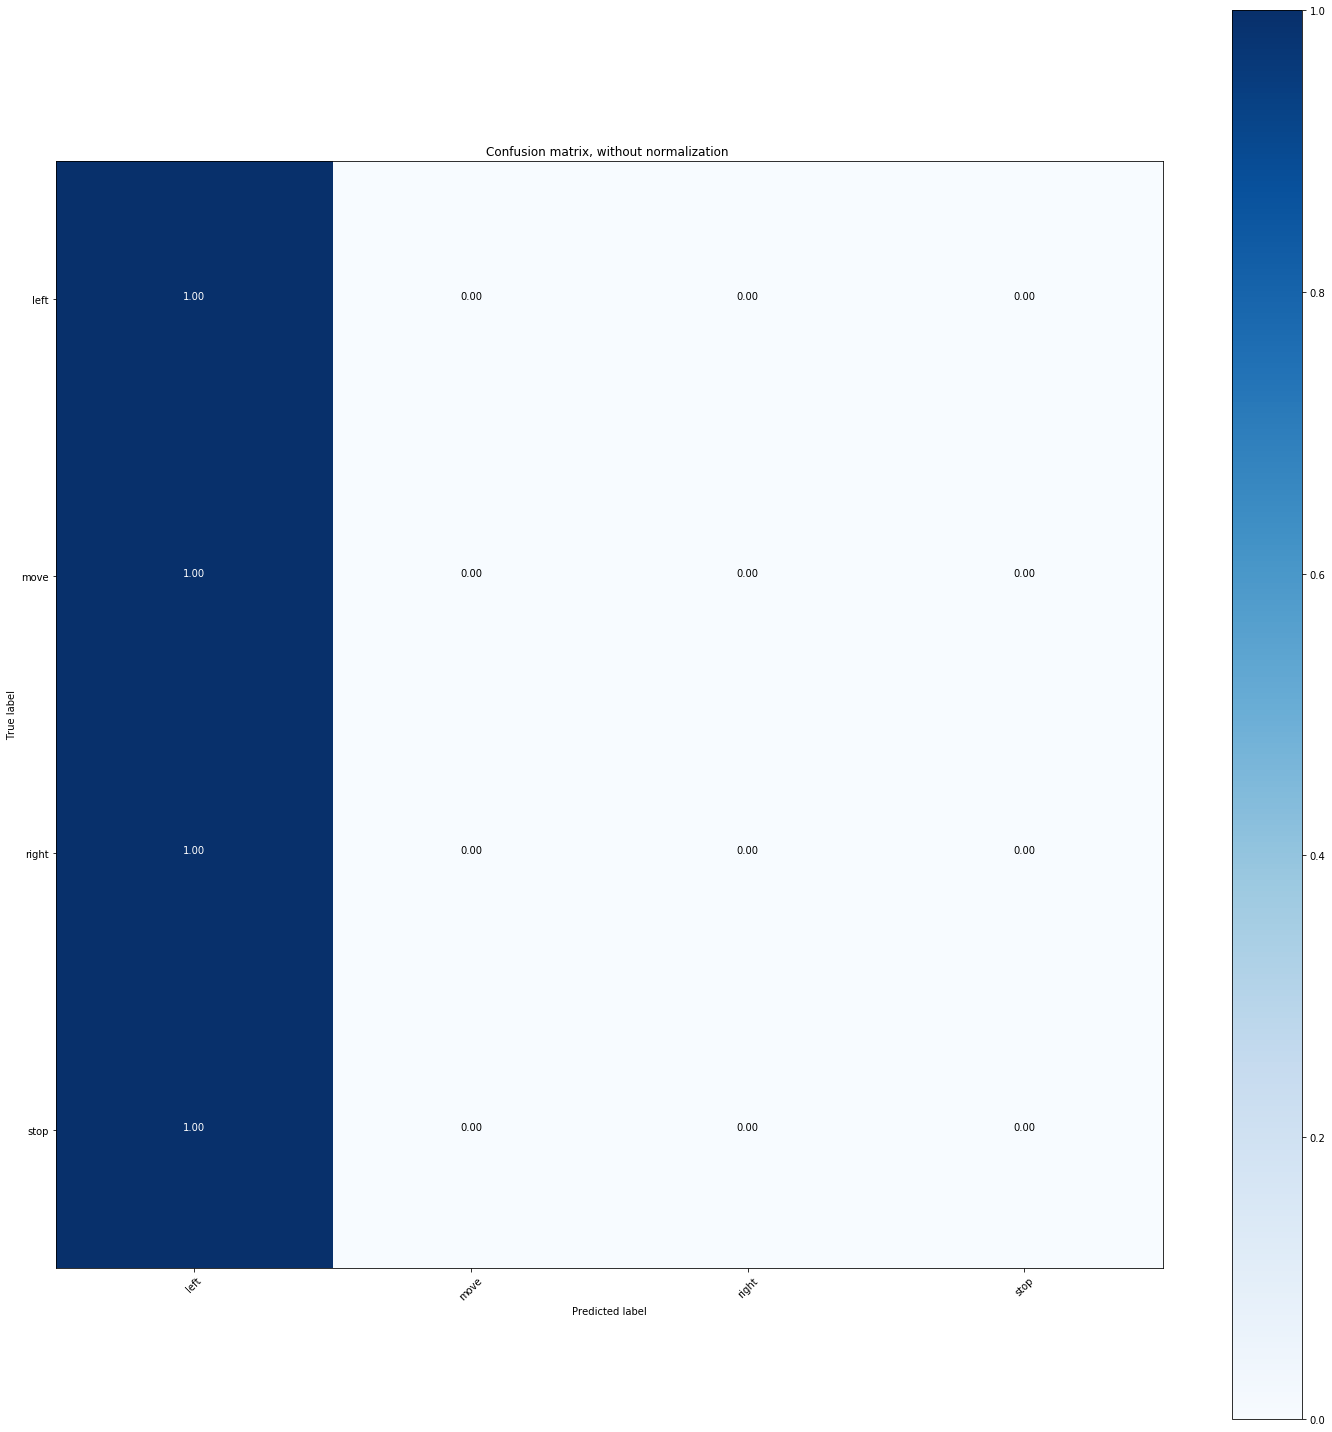

In [8]:
import conf
from keras.models import load_model
Model=load_model("saved10/weights.00.h5")
conf.cnfu_matrix(uniques,Model,xtest,ytest,"LSTM")
# print(counter)

In [16]:
print(len(xtest))
print(uniques)

1944
['ABOUT' 'ABSOLUTELY' 'AROUND' 'ARRESTED' 'ATTACK' 'BECAUSE' 'BELIEVE'
 'BENEFITS' 'BETWEEN' 'BIGGEST']


In [72]:
tgroba=[197.06344156134085, 39.05124837953327, 58.215118311311535, 56.08029957123981, 58.0, 42.04759208325728, 167.0748335327616, 11.180339887498949, 12.0, 12.0, 197.06344156134085, 35.35533905932738, 52.61178575186362, 45.27692569068709, 50.0, 37.0, 169.14490828872147, 5.830951894845301, 5.830951894845301, 5.0, 197.06344156134085, 40.311288741492746, 55.57877292636101, 50.039984012787215, 55.0, 42.0, 167.0748335327616, 8.602325267042627, 7.280109889280518, 5.830951894845301, 197.06344156134085, 40.311288741492746, 52.23983154643591, 48.041648597857254, 52.0, 40.0, 165.07574019219177, 5.385164807134504, 2.0, 3.605551275463989, 197.25364381932212, 39.319206502675, 51.24451190127583, 44.04543109109048, 51.0, 40.11234224026316, 165.14841809717706, 5.385164807134504, 3.605551275463989, 2.0, 197.57024067404484, 35.35533905932738, 45.70557952810576, 42.2965719651132, 47.042533945356304, 37.0, 167.4305826305338, 5.830951894845301, 5.0, 5.385164807134504, 197.57024067404484, 40.311288741492746, 55.226805085936306, 50.039984012787215, 55.0, 43.04648650006177, 167.4305826305338, 10.44030650891055, 7.0, 8.0, 197.25364381932212, 42.2965719651132, 54.589376255824725, 52.23983154643591, 55.0, 40.0, 168.1903683330291, 5.830951894845301, 5.385164807134504, 5.0, 197.12432625122653, 44.28317965096906, 58.54912467321779, 54.230987451824994, 59.07622195096772, 44.04543109109048, 165.19382555047267, 5.385164807134504, 5.0, 3.605551275463989, 197.1623696347759, 49.25444142409901, 69.46221994724903, 64.07027391856539, 69.0, 49.0, 168.07438829280326, 13.0, 13.0, 12.0, 197.12432625122653, 64.07027391856539, 93.34345183246653, 89.1403387922662, 94.0, 67.0, 165.14841809717706, 37.05401462729781, 39.0, 40.0, 197.25364381932212, 73.43704787094863, 104.30723848324239, 100.12492197250393, 103.01941564578979, 72.0, 165.3027525481654, 45.27692569068709, 45.09988913511872, 42.04759208325728, 197.1623696347759, 61.204574992397426, 88.36288813749809, 85.05292469985967, 88.0, 64.0, 163.37074401495514, 24.186773244895647, 24.186773244895647, 24.0, 197.0101520226813, 48.25971404805462, 62.20128616033595, 58.077534382926416, 62.0, 45.09988913511872, 165.0272704737008, 5.830951894845301, 5.0, 5.0, 197.06344156134085, 59.21148537234985, 82.38931969618392, 77.1621668954417, 82.0, 58.0, 162.11107303327555, 21.095023109728988, 21.095023109728988, 19.235384061671343, 197.06344156134085, 62.20128616033595, 84.2140130857092, 77.02596964660685, 85.0, 60.0, 163.07666908543356, 18.24828759089466, 18.0, 18.0, 197.3068675946177, 50.635955604688654, 75.4254598925323, 70.178344238091, 72.02777242147643, 52.0, 161.31026005806325, 11.40175425099138, 10.0, 7.0, 197.42846805868703, 52.46903848937962, 74.43117626371358, 67.06713054842886, 72.02777242147643, 52.0, 164.51443705644803, 10.44030650891055, 10.44030650891055, 10.0, 197.25364381932212, 50.24937810560445, 72.44308110509934, 65.19202405202648, 70.02856560004639, 48.093658625644196, 165.51132891738862, 15.811388300841896, 15.132745950421556, 13.152946437965905, 197.42846805868703, 53.23532661682466, 75.66372975210778, 70.178344238091, 72.02777242147643, 50.0, 165.43578814754684, 13.92838827718412, 12.36931687685298, 13.152946437965905, 197.42846805868703, 49.49747468305833, 71.7007670809734, 67.1863081289633, 72.02777242147643, 49.040799340956916, 163.44112089679268, 15.297058540778355, 12.36931687685298, 15.132745950421556, 197.36514383244068, 50.24937810560445, 72.3394774656273, 70.02856560004639, 73.0, 50.0, 165.3027525481654, 15.297058540778355, 15.132745950421556, 12.0, 197.36514383244068, 50.48762224545735, 70.34912934784623, 68.18357573492314, 70.02856560004639, 47.0, 165.51132891738862, 12.36931687685298, 12.36931687685298, 12.165525060596439, 197.25364381932212, 45.5411901469428, 62.80127387243033, 60.207972893961475, 63.0317380372777, 45.09988913511872, 165.19382555047267, 7.280109889280518, 7.280109889280518, 5.0, 197.25364381932212, 43.289721643826724, 62.80127387243033, 55.226805085936306, 60.0, 45.09988913511872, 167.29913329123974, 8.246211251235321, 5.385164807134504, 5.0, 197.25364381932212, 42.2965719651132, 59.53990258641679, 52.23983154643591, 57.0350769263968, 42.0, 168.2973558912914, 5.385164807134504, 3.0, 5.0, 197.57024067404484, 45.70557952810576, 62.80127387243033, 57.21887800367987, 62.07253821135398, 45.0, 165.43578814754684, 5.830951894845301, 4.242640687119285, 3.0, 197.42846805868703, 40.311288741492746, 60.8276253029822, 55.57877292636101, 60.07495318350236, 43.104524124504614, 167.4305826305338, 5.830951894845301, 5.385164807134504, 3.605551275463989, 197.25364381932212, 41.773197148410844, 55.90169943749474, 50.48762224545735, 55.226805085936306, 41.0, 171.23667831396403, 2.8284271247461903, 2.8284271247461903, 0.0]
tgroba=np.reshape(tgroba,(29,10))
print(Model.predict(np.array([tgroba])))

[[  2.51884647e-02   5.12446230e-03   5.67834117e-02   1.00564407e-02
    6.50422080e-05   1.77863752e-04   1.54663468e-07   9.02542174e-01
    6.45804960e-07   6.13278316e-05]]


In [9]:
print(counter/len(xtest))

0.6831275720164609


In [24]:
print(uniques)
uniques=np.array(uniques)
np.save("words",uniques)

['ABOUT' 'ABSOLUTELY' 'AROUND' 'ARRESTED' 'ATTACK' 'BECAUSE' 'BELIEVE'
 'BENEFITS' 'BETWEEN' 'BIGGEST']


In [9]:
from keras.models import load_model
#Model=load_model("LSTM.h5")
print(Model.predict(np.array([xtest[0]])))

[[  2.17556907e-03   7.67382383e-01   1.19242774e-04   4.57068090e-04
    4.91949868e-06   9.50241275e-03   2.76764331e-04   2.14363009e-01
    4.98431223e-03   7.34325615e-04]]
